<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




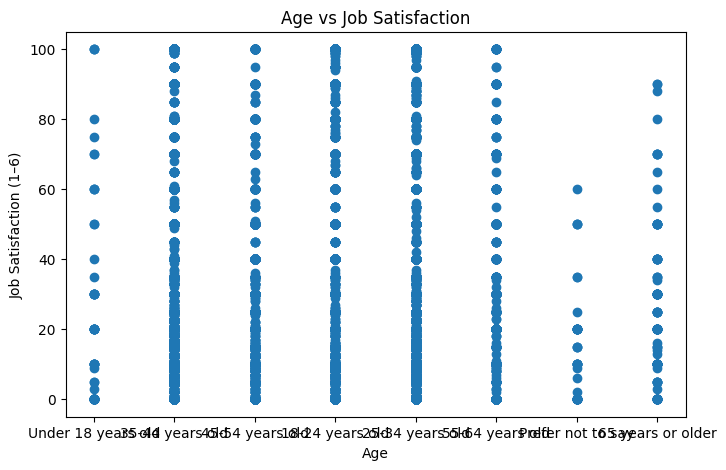

In [3]:
plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['JobSatPoints_6'])
plt.xlabel("Age")
plt.ylabel("Job Satisfaction (1–6)")
plt.title("Age vs Job Satisfaction")
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


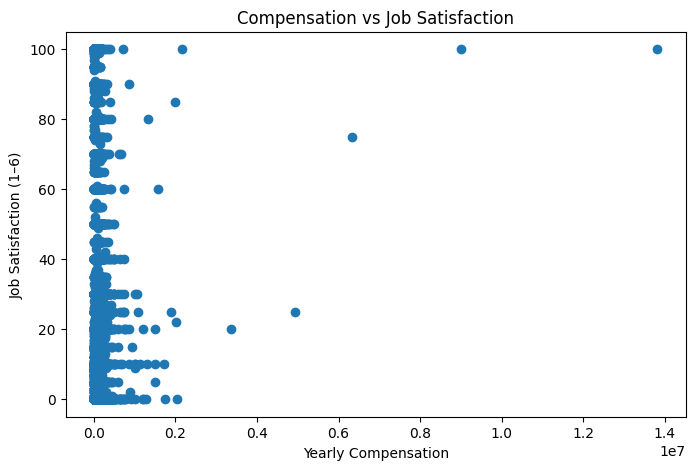

In [4]:
plt.figure(figsize=(8,5))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'])
plt.xlabel("Yearly Compensation")
plt.ylabel("Job Satisfaction (1–6)")
plt.title("Compensation vs Job Satisfaction")
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


NameError: name 'np' is not defined

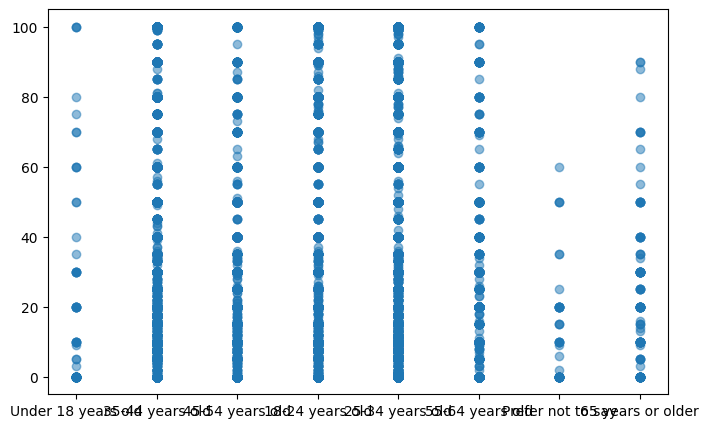

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['JobSatPoints_6'], alpha=0.5)

# Trend Line
z = np.polyfit(df['Age'], df['JobSatPoints_6'], 1)
p = np.poly1d(z)
plt.plot(df['Age'], p(df['Age']), linewidth=2)

plt.xlabel("Age")
plt.ylabel("Job Satisfaction (1–6)")
plt.title("Age vs Job Satisfaction with Trend Line")
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


Unique raw values in YearsCodePro (sample):
['17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37' '15'
 '20' '6' '2' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9' '33'
 '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39' '44'
 '42' '41' '36' '38' 'More than 50 years' '43' '47' '48']

Converted sample (original -> numeric):
YearsCodePro  YearsCodePro_num
          17              17.0
          27              27.0
           7               7.0
          11              11.0
          25              25.0
          12              12.0
          10              10.0
          27              27.0
           3               3.0
          10              10.0

How many non-numeric / NaN after conversion: 16683
Total rows: 65437


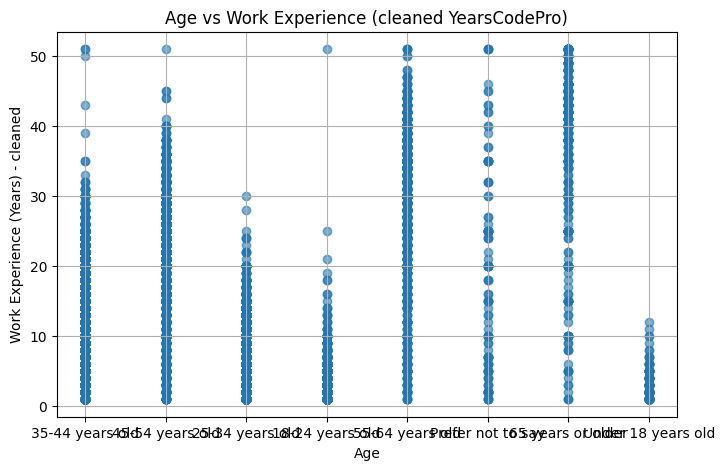

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Unique raw values in YearsCodePro (sample):")
print(df['YearsCodePro'].dropna().unique()[:50])  

def yearscode_to_numeric(v):
    if pd.isna(v):
        return np.nan
    if isinstance(v, (int, float)):
        return float(v)
    v_str = str(v).strip()
    # common special cases
    if v_str.lower() in ['less than 1', '<1', '0-1', 'less than one', '1 or less']:
        return 0.5
    if 'more than' in v_str.lower() or '>' in v_str:
        
        nums = [int(s) for s in re.findall(r'\d+', v_str)]
        return float(nums[0]) + 1.0 if nums else 51.0
    # try to extract a number directly (handles things like '5', '10', '3.5')
    try:
        # remove commas and other stray chars
        cleaned = v_str.replace(',', '')
        # if it's a range like "3-5", take midpoint
        if '-' in cleaned and any(ch.isdigit() for ch in cleaned):
            parts = [p for p in cleaned.split('-') if p.strip()!='']
            nums = []
            for p in parts:
                try:
                    nums.append(float(p))
                except:
                    # ignore
                    pass
            if len(nums) == 2:
                return float((nums[0] + nums[1]) / 2.0)
        # try direct float conversion
        return float(cleaned)
    except Exception:
        return np.nan

# regex used above
import re

# create a new cleaned numeric column
df['YearsCodePro_num'] = df['YearsCodePro'].apply(yearscode_to_numeric)

# show a few examples and counts of coerced values
print("\nConverted sample (original -> numeric):")
print(df[['YearsCodePro', 'YearsCodePro_num']].dropna().head(10).to_string(index=False))

print("\nHow many non-numeric / NaN after conversion:", df['YearsCodePro_num'].isna().sum())
print("Total rows:", len(df))

# 3) Now plot Age vs cleaned YearsCodePro
# drop rows where either is missing
plot_df = df[['Age', 'YearsCodePro_num']].dropna()

plt.figure(figsize=(8,5))
plt.scatter(plot_df['Age'], plot_df['YearsCodePro_num'], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Work Experience (Years) - cleaned")
plt.title("Age vs Work Experience (cleaned YearsCodePro)")
plt.grid(True)
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


Columns in df:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncW

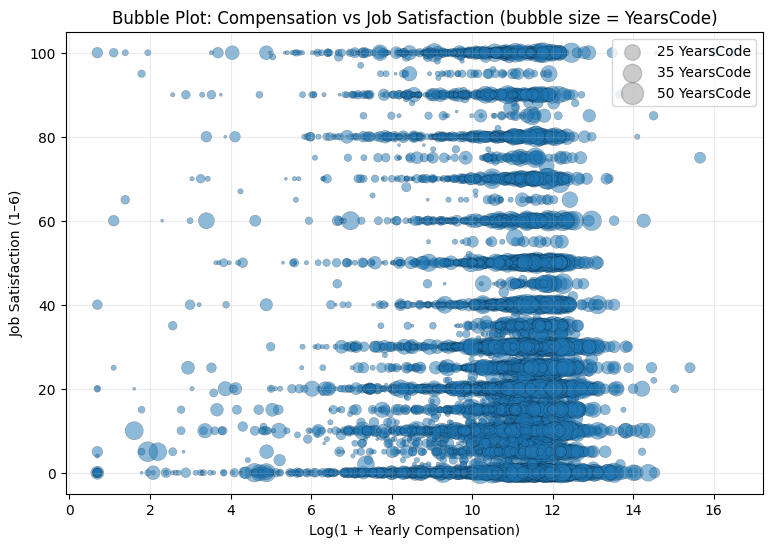


Sample rows used for plotting (first 8):
    Comp  JobSat  Age  YearsCode
  7322.0    65.0  NaN        1.0
 91295.0     0.0  NaN        6.0
110000.0    20.0  NaN        7.0
161044.0    30.0  NaN       18.0
195000.0    30.0  NaN       30.0
 79481.0    25.0  NaN       16.0
170000.0    20.0  NaN       17.0
 29000.0     0.0  NaN        1.0


In [10]:

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


print("Columns in df:")
print(df.columns.tolist())
print("\nNon-null counts (top columns of interest):")
for col in ['ConvertedCompYearly','JobSatPoints_6','Age','YearsCodePro','YearsCodePro_num']:
    if col in df.columns:
        print(f"{col}: {df[col].notna().sum()} non-null")
    else:
        print(f"{col}: NOT IN DATAFRAME")

def parse_comp(v):
    if pd.isna(v): return np.nan
    if isinstance(v, (int,float)): return float(v)
    s = str(v).strip()
    
    s = s.replace(',', '')
    s = re.sub(r'[\$\£\€]|USD|usd|EUR|EUR|AUD|INR|GBP', '', s, flags=re.IGNORECASE)
   
    if '-' in s and any(ch.isdigit() for ch in s):
        parts = [p for p in s.split('-') if p.strip()!='']
        nums = []
        for p in parts:
            try:
                nums.append(float(re.sub(r'[^\d\.]', '', p)))
            except:
                pass
        if len(nums) == 2:
            return float((nums[0] + nums[1]) / 2.0)

    m = re.search(r'(\d+(\.\d+)?)', s)
    if m:
        try:
            return float(m.group(1))
        except:
            return np.nan
    return np.nan

if 'ConvertedCompYearly_num' not in df.columns:
    df['ConvertedCompYearly_num'] = df['ConvertedCompYearly'].apply(parse_comp) if 'ConvertedCompYearly' in df.columns else np.nan

if 'JobSatPoints_6_num' not in df.columns:
    
    if 'JobSatPoints_6' in df.columns:
        df['JobSatPoints_6_num'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
    else:
        df['JobSatPoints_6_num'] = np.nan

if 'Age_num' not in df.columns:
    if 'Age' in df.columns:
        df['Age_num'] = pd.to_numeric(df['Age'], errors='coerce')
    else:
        df['Age_num'] = np.nan

def yearscode_to_numeric_simple(v):
    if pd.isna(v): return np.nan
    if isinstance(v, (int,float)): return float(v)
    s = str(v).strip().lower()
    if s in ['less than 1','<1','0-1','less than one','1 or less']:
        return 0.5
    if 'more than' in s or '>' in s:
        nums = re.findall(r'\d+', s)
        return float(nums[0]) + 1 if nums else 51.0

    if '-' in s:
        parts = [p for p in s.split('-') if p.strip()!='']
        try:
            nums = [float(re.sub(r'[^\d\.]','',p)) for p in parts]
            if len(nums)==2: return (nums[0]+nums[1])/2.0
        except: pass
    try:
        return float(re.sub(r'[^\d\.]','', s))
    except:
        return np.nan

if 'YearsCodePro_num' not in df.columns and 'YearsCodePro' in df.columns:
    df['YearsCodePro_num'] = df['YearsCodePro'].apply(yearscode_to_numeric_simple)
elif 'YearsCodePro_num' not in df.columns:
    df['YearsCodePro_num'] = np.nan

print("\nNaNs after conversion: ConvertedCompYearly_num: {}, JobSatPoints_6_num: {}, Age_num: {}, YearsCodePro_num: {}"
      .format(df['ConvertedCompYearly_num'].isna().sum(),
              df['JobSatPoints_6_num'].isna().sum(),
              df['Age_num'].isna().sum(),
              df['YearsCodePro_num'].isna().sum()))

plot_df_xy = df[['ConvertedCompYearly_num','JobSatPoints_6_num']].dropna()
print("\nRows with both Comp and JobSat non-null:", len(plot_df_xy))

if len(plot_df_xy) == 0:
    
    alt = df[['Age_num','JobSatPoints_6_num']].dropna()
    if len(alt) > 0:
        print("Fallback: plotting Age vs JobSat because no Comp+JobSat rows. Rows:", len(alt))
        plt.figure(figsize=(8,5))
        plt.scatter(alt['Age_num'], alt['JobSatPoints_6_num'], alpha=0.6)
        plt.xlabel("Age")
        plt.ylabel("Job Satisfaction (1-6)")
        plt.title("Fallback: Age vs JobSat")
        plt.show()
        raise SystemExit("Completed fallback plot.")
    else:
        raise ValueError("No rows with both compensation and job satisfaction, and no Age+JobSat fallback. Inspect your dataset columns and non-null counts above.")

plot_df = df.loc[plot_df_xy.index, ['ConvertedCompYearly_num','JobSatPoints_6_num','Age_num','YearsCodePro_num']].copy()
plot_df = plot_df.rename(columns={'ConvertedCompYearly_num':'Comp','JobSatPoints_6_num':'JobSat','Age_num':'Age','YearsCodePro_num':'YearsCode'})

if plot_df['Age'].notna().sum() > 0:
    size_source = 'Age'
    s_raw = plot_df['Age'].fillna(plot_df['Age'].median())
elif plot_df['YearsCode'].notna().sum() > 0:
    size_source = 'YearsCode'
    s_raw = plot_df['YearsCode'].fillna(plot_df['YearsCode'].median())
else:
    size_source = 'constant'
    s_raw = pd.Series(np.ones(len(plot_df)), index=plot_df.index)

print(f"Using bubble size source: {size_source}. Non-null sizes: {s_raw.notna().sum()}. Rows used for plotting: {len(plot_df)}")

s_raw = pd.to_numeric(s_raw, errors='coerce').fillna(s_raw.median())
s_raw[s_raw <= 0] = max(1.0, s_raw.median())

s = s_raw.values * 5.0  # scale factor

x = np.log1p(np.clip(plot_df['Comp'].values, a_min=0, a_max=None))
y = plot_df['JobSat'].values

plt.figure(figsize=(9,6))
plt.scatter(x, y, s=s, alpha=0.5, edgecolor='k', linewidth=0.2)
plt.xlabel("Log(1 + Yearly Compensation)")
plt.ylabel("Job Satisfaction (1–6)")
plt.title("Bubble Plot: Compensation vs Job Satisfaction (bubble size = {})".format(size_source))
plt.grid(alpha=0.25)

for example in [25, 35, 50]:
    plt.scatter([], [], s=example*5, c='gray', alpha=0.4, label=f'{example} {size_source}')
plt.legend(scatterpoints=1, framealpha=0.8, loc='upper right')
plt.show()

print("\nSample rows used for plotting (first 8):")
print(plot_df[['Comp','JobSat','Age','YearsCode']].head(8).to_string(index=False))


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


Detected columns -> language: LanguageHaveWorkedWith | jobsat: JobSatPoints_6
Created LanguageHaveWorkedWith_clean from 'LanguageHaveWorkedWith'
Rows with both language and jobsat non-null: 29299
Top languages used: ['JavaScript', 'SQL', 'HTML/CSS', 'Python', 'TypeScript', 'Bash/Shell (all shells)', 'Java', 'C#', 'C++', 'PHP']


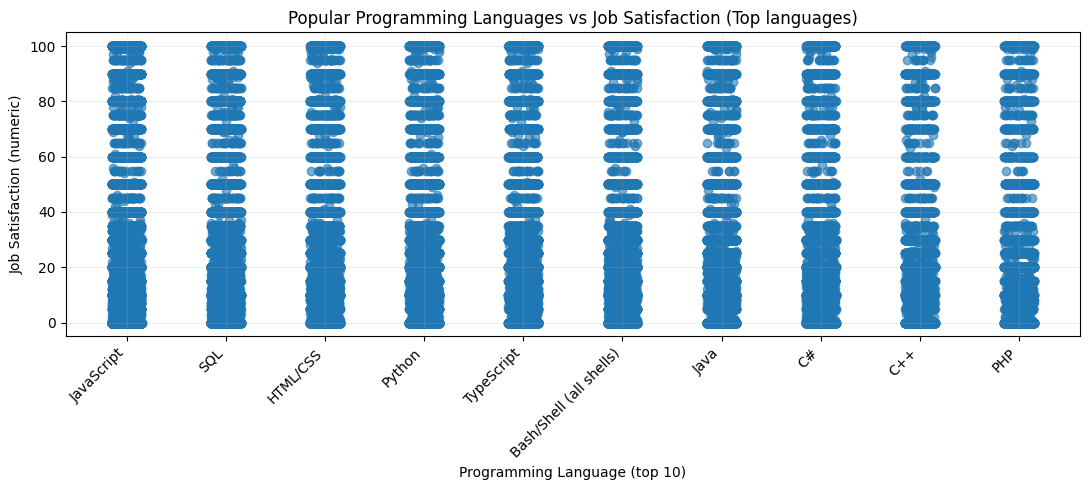


Sample plotted rows (first 10):
               Language  JobSat
Bash/Shell (all shells)     0.0
               HTML/CSS     0.0
                   Java     0.0
             JavaScript     0.0
                 Python     0.0
             TypeScript     0.0
             JavaScript    25.0
                 Python    25.0
Bash/Shell (all shells)    30.0
                     C#    30.0


In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

lang_variants = [
    'LanguageHaveWorkedWith', 'LanguageWorkedWith', 'LanguagesWorkedWith',
    'LanguageHaveWorkedWith_clean', 'language_have_worked_with'
]
jobsat_variants = [
    'JobSatPoints_6', 'JobSatPoints', 'JobSat', 'JobSatisfaction', 'JobSatPoints_6_num'
]

found_lang = next((c for c in lang_variants if c in df.columns), None)
found_jobsat = next((c for c in jobsat_variants if c in df.columns), None)

print("Detected columns -> language:", found_lang, "| jobsat:", found_jobsat)

if 'LanguageHaveWorkedWith_clean' not in df.columns:
    if found_lang is not None:
        df['LanguageHaveWorkedWith_clean'] = df[found_lang].astype(str).replace({'nan': np.nan})
        print(f"Created LanguageHaveWorkedWith_clean from '{found_lang}'")
    else:
        df['LanguageHaveWorkedWith_clean'] = np.nan
        print("No language column found; LanguageHaveWorkedWith_clean created as all NaN")

if 'JobSatPoints_6_num' not in df.columns:
    if found_jobsat is not None:
        df['JobSatPoints_6_num'] = pd.to_numeric(df[found_jobsat], errors='coerce')
        print(f"Created JobSatPoints_6_num from '{found_jobsat}' (coerced to numeric)")
    else:
        alt_candidates = ['JobSatisfaction', 'JobSat', 'JobSatPoints_6']
        alt_found = next((c for c in alt_candidates if c in df.columns), None)
        if alt_found:
            df['JobSatPoints_6_num'] = pd.to_numeric(df[alt_found], errors='coerce')
            print(f"Created JobSatPoints_6_num from alt '{alt_found}'")
        else:
            df['JobSatPoints_6_num'] = np.nan
            print("No job satisfaction column found; JobSatPoints_6_num created as all NaN")

mask = df['LanguageHaveWorkedWith_clean'].notna() & df['JobSatPoints_6_num'].notna()
usable = df.loc[mask, ['LanguageHaveWorkedWith_clean','JobSatPoints_6_num']]

print("Rows with both language and jobsat non-null:", len(usable))

if usable.empty:
    print("Task 3.2: No usable rows (Language + JobSat). Trying fallback: check raw 'LanguageHaveWorkedWith' rows and JobSat separately.")
    
    if found_lang and found_jobsat:
        usable = df.loc[df[found_lang].notna() & df[found_jobsat].notna(), [found_lang, found_jobsat]]
        usable.columns = ['LanguageHaveWorkedWith_clean','JobSatPoints_6_num']
        usable['JobSatPoints_6_num'] = pd.to_numeric(usable['JobSatPoints_6_num'], errors='coerce')
        print("Fallback rows found:", len(usable))
    if usable.empty:
        print("Still no usable rows. Task 3.2 will be skipped.")
else:
    
    pass

if usable.empty:
  
    print("\nDiagnostics: available columns in df (first 40):")
    print(df.columns.tolist()[:40])
    raise SystemExit("No data to plot for Task 3.2 (Language vs JobSat).")

lang_counts = {}
rows = []
for idx, r in usable.iterrows():
    langs = [l.strip() for l in str(r['LanguageHaveWorkedWith_clean']).split(';') if l.strip()!='']
    for lg in langs:
        lang_counts[lg] = lang_counts.get(lg, 0) + 1
        rows.append((lg, r['JobSatPoints_6_num']))

if not lang_counts:
    rows = []
    for idx, r in usable.iterrows():
        s = str(r['LanguageHaveWorkedWith_clean'])
        if ',' in s:
            parts = [p.strip() for p in s.split(',') if p.strip()!='']
        elif '|' in s:
            parts = [p.strip() for p in s.split('|') if p.strip()!='']
        else:
            parts = [s.strip()]
        for lg in parts:
            lang_counts[lg] = lang_counts.get(lg, 0) + 1
            rows.append((lg, r['JobSatPoints_6_num']))

final_df = pd.DataFrame(rows, columns=['Language','JobSat'])
if final_df.empty:
    print("No language entries extracted after splitting attempts. Skipping Task 3.2.")
    raise SystemExit("No language tokens to plot.")

top_langs = sorted(lang_counts, key=lang_counts.get, reverse=True)[:10]
print("Top languages used:", top_langs)

final_df = final_df[final_df['Language'].isin(top_langs)].reset_index(drop=True)
if final_df.empty:
    print("After filtering to top languages, no rows remain. Skipping plot.")
    raise SystemExit("No rows for top languages.")


x_positions = {lg:i for i,lg in enumerate(top_langs)}
xs = [x_positions[l] + np.random.uniform(-0.15, 0.15) for l in final_df['Language']]
ys = final_df['JobSat'].astype(float).values

plt.figure(figsize=(11,5))
plt.scatter(xs, ys, alpha=0.6)
plt.xticks(range(len(top_langs)), top_langs, rotation=45, ha='right')
plt.ylabel("Job Satisfaction (numeric)")
plt.xlabel("Programming Language (top 10)")
plt.title("Popular Programming Languages vs Job Satisfaction (Top languages)")
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

print("\nSample plotted rows (first 10):")
print(final_df.head(10).to_string(index=False))


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


Employment_clean created from 'Employment'
Rows with Comp + JobSat + Employment: 16185


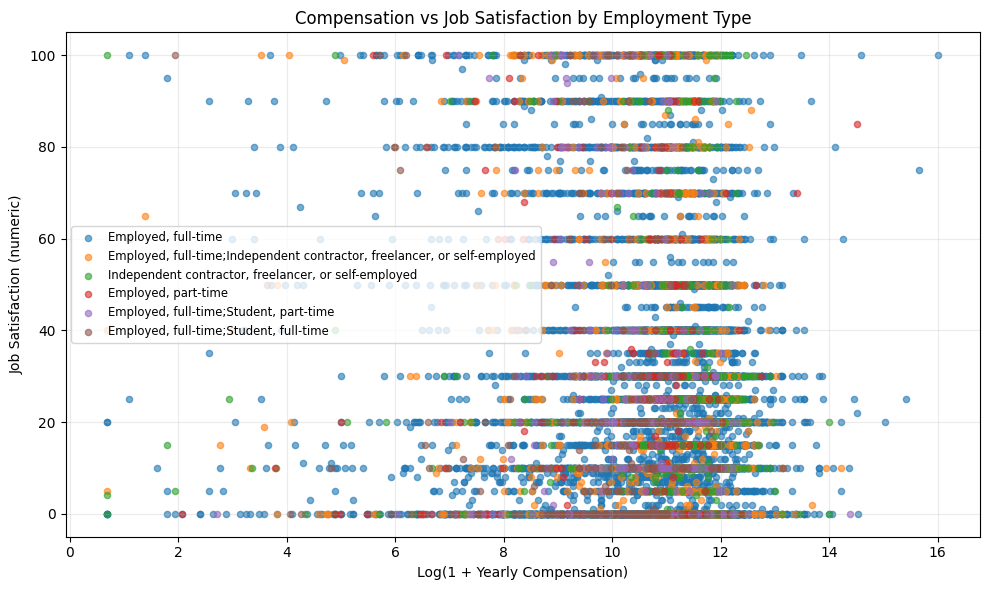


Plotted employment categories and counts:
Employment_clean
Employed, full-time                                                         12621
Employed, full-time;Independent contractor, freelancer, or self-employed     1312
Independent contractor, freelancer, or self-employed                          636
Employed, part-time                                                           294
Employed, full-time;Student, part-time                                        285
Employed, full-time;Student, full-time                                        222


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

if 'Employment_clean' not in df.columns:
    if 'Employment' in df.columns:
        df['Employment_clean'] = df['Employment'].astype(str).str.strip().replace({'nan': np.nan})
        print("Employment_clean created from 'Employment'")
    else:
        df['Employment_clean'] = np.nan
        print("No Employment column found; Employment_clean created as all NaN")

required = ['ConvertedCompYearly_num', 'JobSatPoints_6_num', 'Employment_clean']
for c in required:
    if c not in df.columns:
        raise RuntimeError(f"Required column missing: {c}")

p = df[required].dropna()
print("Rows with Comp + JobSat + Employment:", len(p))

if p.empty:
    print("Task 4.1: No rows available with Compensation + JobSat + Employment — plot skipped.")
else:
    
    top_emp = p['Employment_clean'].value_counts().index[:6].tolist()
    subset = p[p['Employment_clean'].isin(top_emp)]

    plt.figure(figsize=(10,6))
    for emp in top_emp:
        emp_data = subset[subset['Employment_clean'] == emp]
        # guard: ensure arrays not empty
        if emp_data.empty:
            continue
        x = np.log1p(np.clip(emp_data['ConvertedCompYearly_num'].astype(float).values, 0, None))
        y = emp_data['JobSatPoints_6_num'].astype(float).values
        plt.scatter(x, y, alpha=0.6, label=emp, s=20)

    plt.xlabel("Log(1 + Yearly Compensation)")
    plt.ylabel("Job Satisfaction (numeric)")
    plt.title("Compensation vs Job Satisfaction by Employment Type")
    plt.grid(alpha=0.25)
    plt.legend(ncol=1, fontsize='small', loc='best')
    plt.tight_layout()
    plt.show()

    print("\nPlotted employment categories and counts:")
    print(subset['Employment_clean'].value_counts().loc[top_emp].to_string())


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


Rows with Age + YearsCodePro + Country: 50273


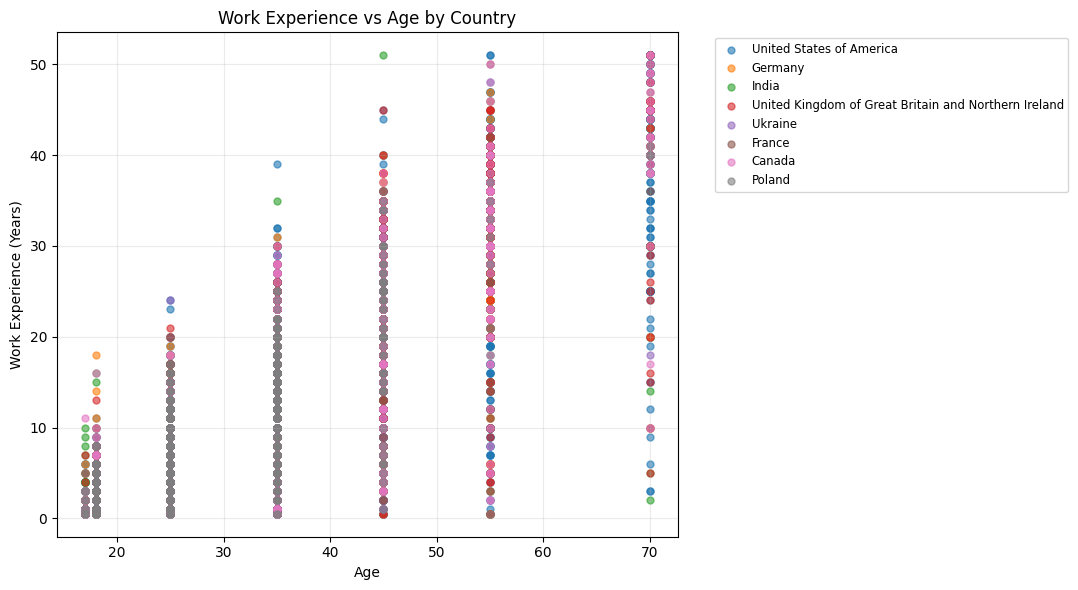


Countries plotted and row counts:
Country_clean
United States of America                                9528
Germany                                                 4309
India                                                   3309
United Kingdom of Great Britain and Northern Ireland    2778
Ukraine                                                 2410
France                                                  1868
Canada                                                  1798
Poland                                                  1329


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

if 'Country_clean' not in df.columns:
    df['Country_clean'] = df['Country'].astype(str).str.strip().replace({'nan': np.nan})
    print("Country_clean created from 'Country'")

p = df[['Age_num', 'YearsCodePro_num', 'Country_clean']].dropna()

print("Rows with Age + YearsCodePro + Country:", len(p))

if p.empty:
    print("No usable rows — but this should NOT happen with your cleaned columns.")
else:
    
    top_countries = p['Country_clean'].value_counts().index[:8].tolist()
    subset = p[p['Country_clean'].isin(top_countries)]

    plt.figure(figsize=(11,6))

    
    for country in top_countries:
        cdata = subset[subset['Country_clean'] == country]
        plt.scatter(
            cdata['Age_num'],
            cdata['YearsCodePro_num'],
            alpha=0.6,
            s=25,
            label=country
        )

    plt.xlabel("Age")
    plt.ylabel("Work Experience (Years)")
    plt.title("Work Experience vs Age by Country")
    plt.grid(alpha=0.25)

    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

    plt.tight_layout()
    plt.show()

    
    print("\nCountries plotted and row counts:")
    print(subset['Country_clean'].value_counts().loc[top_countries].to_string())


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
